In [113]:
%pylab inline
import os
par_dir = os.path.split(os.getcwd())[0]
if par_dir not in sys.path:
    sys.path.append(par_dir)

import thulium_python_lib.usefull_functions as usfuncs
import thulium_python_lib.image_processing_new as impr

Populating the interactive namespace from numpy and matplotlib


In [149]:
# home directory (where to save figures)
os.chdir(r'D:\!Data\2015_11_13 Кристаллы и калибровка камеры\те же картинки но в jpg')

In [150]:
folder = ''
working_directory = os.path.join(os.getcwd(),folder)

In [151]:

os.listdir(working_directory)

['02 cr b=off t=2ms', '03']

D:\!Data\2015_11_13 Кристаллы и калибровка камеры\те же картинки но в jpg\02 cr b=off t=2ms
D:\!Data\2015_11_13 Кристаллы и калибровка камеры\те же картинки но в jpg\03


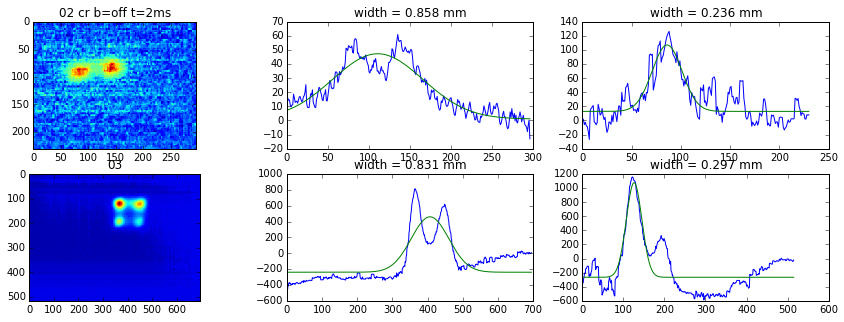

In [152]:
# to curretly handle this data shoul be structured as followed:
# folder_mes
#              fig1
#              fig2
#              ...
# program averages all figures in folder and plots them with fits
# to do the same with figures in one folder change parts
data = dict()
for dr in os.listdir(working_directory):
    rel_par_dir = os.path.join(working_directory,dr)
    # for few folder
    print(rel_par_dir)
    if not os.path.isdir(rel_par_dir):
        continue
    im = impr.Image_Basics(mean([imread(os.path.join(rel_par_dir,fl))[:,:,1] for fl in os.listdir(rel_par_dir) 
                                 if fl.endswith('.jpg')],0) )
    im.fit_x = im.fit_gaussian1D(axis=0)
    im.fit_y = im.fit_gaussian1D(axis=1)
    data[dr] = im
    # for one directory
#    if dr.endswith('jpg'):
#        im = impr.Image_Basics(imread(os.path.join(rel_par_dir,fl))[:,:,1])
#        im.fit_x = im.fit_gaussian1D(axis=0)
#        im.fit_y = im.fit_gaussian1D(axis=1)
#        data[dr] = im
fig, ax = subplots(max(len(data),2),3,figsize=(15,max(len(data),2)*2.5))
for i,d in enumerate(data):
    ax[i,0].imshow(data[d].image)
    ax[i,0].set_title(d)
    for j in (0,1):
        y = sum(data[d].image,j)
        x = range(len(y))
        ax[i,j+1].plot(x,y)
        ax[i,j+1].plot(x,impr.gaussian(x,*getattr(data[d],'fit_y' if j else 'fit_x')))
        ax[i,j+1].set_title('width = %.3f mm' % (0.011 * getattr(data[d],'fit_y' if j else 'fit_x')[2]))

In [144]:
# to save figure
fig.savefig('beam_profile.jpg
')

SyntaxError: EOL while scanning string literal (<ipython-input-144-b0c46eea3986>, line 2)

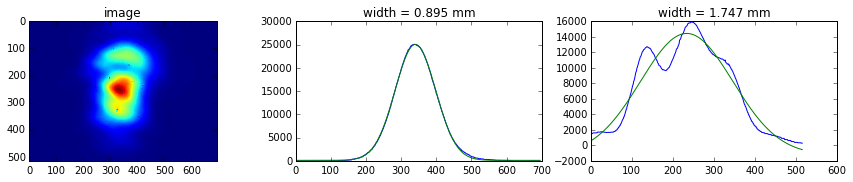

In [111]:
# to plot individual image

im = impr.Image_Basics(imread(r'D:\!Data\2016_01_19\5.jpg')[:,:,0])

fig, ax = subplots(1,3,figsize=(15,2.5))
im.fit_x = im.fit_gaussian1D(axis=0)
im.fit_y = im.fit_gaussian1D(axis=1)
ax[0].imshow(im.image)
ax[0].set_title('image')
for j in (0,1):
    y = sum(im.image,j)
    x = range(len(y))
    ax[j+1].plot(x,y)
    ax[j+1].plot(x,impr.gaussian(x,*getattr(im,'fit_y' if j else 'fit_x')))
    ax[j+1].set_title('width = %.3f mm' % (0.011 * getattr(im,'fit_y' if j else 'fit_x')[2]))

In [ ]:
a = imread(r'\\BIGONE\\!Data\\2016_01_12 пучок лазера Sacher\\400cm\\CV_Image_916_160112_193117_091.jpg')

In [ ]:
a

In [112]:
fig.savefig(r'D:\!Data\2016_01_19\5.png')

In [145]:
max(len(data),2)

2